# Lending Club Default Analysis
The analysis is divided into four main parts: <br>
    Data understanding <br>
    Data cleaning (cleaning missing values, removing redundant columns etc.)<br>
    Data Analysis <br>
    Conclusion

In [658]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the csv 

In [522]:
df1 = pd.read_csv('loan.csv')

In [671]:
df1.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

Checking out the data/columns available 

In [523]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Shape of the dataframe

In [524]:
df1.shape

(39717, 111)

In [525]:
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [526]:
result = df1.isnull().sum()

Looking at columns with siginificant amount of missing data


In [527]:
result[result>10000]

desc                              12942
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717


Removing columns with large amount of missing values

In [528]:
df2 = df1.drop(result[result>10000].index,axis=1)

In [529]:
df2.shape

(39717, 53)

In [530]:
df2.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

### Data Cleaning
- Need to fix rows and columns
- Need to fix missing values
- Need to standardise values
- Need to fix invalid values
- Need to  filter data

Finding out the most occuured value in emp_title column , emp_length, pub_rec_bankruptcies & replacing the null values with them

In [531]:
emp_title_mode = df2.emp_title.mode()[0]
emp_length_mode = df2.emp_length.mode()[0]
pub_rec_bankruptcies_mode = df2.pub_rec_bankruptcies.mode()[0]

In [532]:
df2.emp_title = df2.emp_title.fillna(emp_title_mode)
df2.emp_length = df2.emp_length.fillna(emp_length_mode)
df2.pub_rec_bankruptcies = df2.pub_rec_bankruptcies.fillna(pub_rec_bankruptcies_mode)


Checking for further cleaup and the effect of columns with null values 

In [533]:
df2.isnull().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

Let's find for presence of columns with single values, which can derived by the presence of unique columns in that column and drop those columns

In [534]:
df2.drop(columns=['title'], inplace=True)

In [535]:
df2.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [536]:
one_value_col = df2.columns[df2.nunique() == 1]
print(one_value_col)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [537]:
df2.drop(columns = df2.columns[df2.nunique() == 1],inplace = True)

Dropping the remaining any columns with null values present in them 

In [538]:
df2.dropna(axis=1,how ='all',inplace = True)

In [539]:
#Finding percentage of null or missing values
null_perc = round(100*(df2.isnull().sum()/len(df2.index)), 2)
null_perc[ null_perc > 0 ]

revol_util            0.13
last_pymnt_d          0.18
last_credit_pull_d    0.01
dtype: float64

In [541]:
df2.dropna(subset=['revol_util', 'last_pymnt_d', 'last_credit_pull_d'], inplace=True)
#Finding percentage of null or missing values
null_perc = round(100*(df2.isnull().sum()/len(df2.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

In [542]:
df2.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [543]:
df2.shape

(39598, 43)

As of above the columns are cleaned up with negligible null values present in them and the dataframe with shape and columns are presented

Proceeding forward objective is to find the loan defaultors , hence columns which provide information such id , memeber_id, zip_code , url vary for every applicant and contain only partital data which tampers the drawbacks. Also columns created after the loan application is approved does not fetch any analysis hence we can plan to drop such columns from our dataframe


In [544]:
unnecessary_cols = ['id','member_id','zip_code','url','total_pymnt_inv','total_pymnt','out_prncp_inv','out_prncp','total_rec_prncp','total_rec_late_fee','recoveries','total_rec_int','collection_recovery_fee','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d']
df2.drop(columns = unnecessary_cols,inplace=True)


In [545]:
df2.shape

(39598, 27)

In [546]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39598 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39598 non-null  int64  
 1   funded_amnt           39598 non-null  int64  
 2   funded_amnt_inv       39598 non-null  float64
 3   term                  39598 non-null  object 
 4   int_rate              39598 non-null  object 
 5   installment           39598 non-null  float64
 6   grade                 39598 non-null  object 
 7   sub_grade             39598 non-null  object 
 8   emp_title             39598 non-null  object 
 9   emp_length            39598 non-null  object 
 10  home_ownership        39598 non-null  object 
 11  annual_inc            39598 non-null  float64
 12  verification_status   39598 non-null  object 
 13  issue_d               39598 non-null  object 
 14  loan_status           39598 non-null  object 
 15  purpose               39

In [547]:
df2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,39598.000000,39598.000000,39598.000000,39598.000000,3.959800e+04,39598.000000,39598.000000,39598.000000,39598.000000,39598.000000,39598.000000,39598.000000,39598.000000
mean,11232.584979,10960.037754,10411.715905,324.888553,6.903508e+04,13.321031,0.146295,0.868554,9.303727,0.055003,13409.292894,22.113970,0.042452
std,7455.138187,7185.306577,7128.162229,208.826448,6.382858e+04,6.675882,0.490985,1.070026,4.399162,0.237111,15894.800723,11.397375,0.202495
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.275000,4.063250e+04,8.190000,0.000000,0.000000,6.000000,0.000000,3723.250000,14.000000,0.000000
50%,10000.000000,9700.000000,8975.000000,280.800000,5.900000e+04,13.410000,0.000000,1.000000,9.000000,0.000000,8868.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.947500,8.250000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17085.750000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


Looking forward on decision making considering the loan_status column & as current does provide neccessary information for approving or rejecting loan dropping it

In [548]:
df2['loan_status'].value_counts()

loan_status
Fully Paid     32915
Charged Off     5543
Current         1140
Name: count, dtype: int64

In [549]:
df2 = df2[~(df2['loan_status'] == 'Current')]
df2.shape

(38458, 27)

In [637]:
#Checking unique values for term column
df2.term.unique()

array(['36 months', '60 months'], dtype=object)

There is empty space at the start of values. Let's remove it.

In [638]:
#Stripping empty space in values in term
df2['term'] = df2.term.str.strip()
df2.term.unique()


array(['36 months', '60 months'], dtype=object)

Let's look at data in few columns picking up interest rate

In [554]:
df2['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38458, dtype: object

Remmoving the presence of % as part of cleaning and prepraring data

In [555]:
df2.int_rate = pd.to_numeric(df2.int_rate.apply(lambda x : x[:-1]))


In [556]:
df2['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38458, dtype: float64

In [557]:

df2['emp_length'].value_counts()

emp_length
10+ years    9503
< 1 year     4488
2 years      4280
3 years      4001
4 years      3328
5 years      3180
1 year       3154
6 years      2164
7 years      1707
8 years      1430
9 years      1223
Name: count, dtype: int64

Employee_length is column which also needs standarsization <1 assuming as 1 and 10+ assuming to be 10

In [558]:
df2.emp_length = df2.emp_length.apply(lambda x : 0 if '<' in x else (x.split('+')[0] if '+' in x else x.split()[0]))

In [560]:
df2['emp_length'].value_counts()

emp_length
10    9503
0     4488
2     4280
3     4001
4     3328
5     3180
1     3154
6     2164
7     1707
8     1430
9     1223
Name: count, dtype: int64

In [561]:
df2['revol_util'].value_counts()

revol_util
0%        952
63%        62
0.20%      61
31.20%     57
40.70%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1088, dtype: int64

Revol util 

In [562]:
def convert_revol_util(x):
    if isinstance(x,str):
        return pd.to_numeric(x.split('%')[0])
    else:
        return x

df2.revol_util = df2.revol_util.apply(convert_revol_util)

In [563]:
df2['revol_util'].value_counts()

revol_util
0.00     952
63.00     62
0.20      61
31.20     57
40.70     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: count, Length: 1088, dtype: int64

In [564]:
df2['revol_util'] = df2['revol_util'].fillna(df2['revol_util'].mode()[0])


Checking out bxxplots for int_rate 

<Axes: >

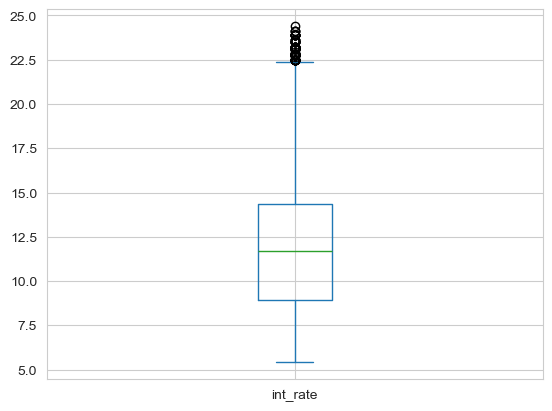

In [565]:
df2['int_rate'].plot.box()

Constructing month and year from issue_d column

In [566]:
df2['issue_d'].value_counts()

issue_d
Nov-11    2056
Dec-11    2041
Oct-11    1936
Sep-11    1907
Aug-11    1797
Jul-11    1736
Jun-11    1724
May-11    1605
Apr-11    1556
Mar-11    1435
Jan-11    1380
Feb-11    1297
Dec-10    1266
Oct-10    1125
Nov-10    1120
Jul-10    1117
Sep-10    1084
Aug-10    1073
Jun-10    1022
May-10     918
Apr-10     826
Mar-10     735
Feb-10     622
Nov-09     597
Dec-09     595
Jan-10     585
Oct-09     543
Sep-09     447
Aug-09     408
Jul-09     372
Jun-09     353
May-09     319
Apr-09     287
Mar-09     275
Feb-09     259
Jan-09     236
Mar-08     232
Dec-08     222
Nov-08     183
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      84
Jul-08      82
May-08      71
Aug-08      70
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [582]:
#converting to date type
df2['issue_d'] = pd.to_datetime(df2.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
df2['issue_d'] = df2['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

df2['earliest_cr_line'] = pd.to_datetime(df2.earliest_cr_line, format='%b-%y')
df2['earliest_cr_line'] = df2['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [584]:
#issue_d column
df2['issue_d_year'] = df2.issue_d.dt.year
df2['issue_d_month'] = df2.issue_d.dt.strftime('%b')
df2['issue_d_weekday'] = df2.issue_d.dt.weekday
df2['issue_d_year'] = df2['issue_d_year'].astype(object)
df2['issue_d_weekday'] = df2['issue_d_weekday'].astype(object)

#earliest_cr_line
df2['earliest_cr_line_year'] = df2.earliest_cr_line.dt.year
df2['earliest_cr_line_month'] = df2.earliest_cr_line.dt.strftime('%b')
df2['earliest_cr_line_year'] = df2['earliest_cr_line_year'].astype(object)

Checking for any kind of outliers

<Axes: >

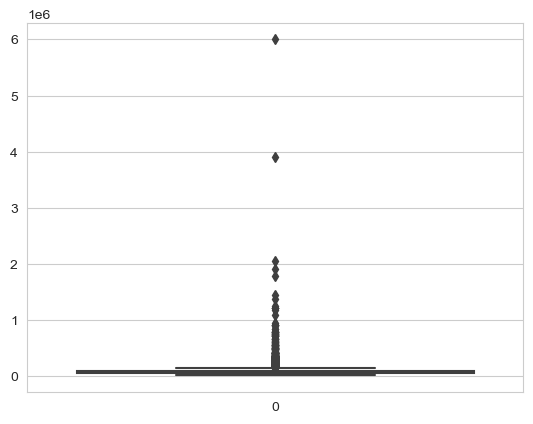

In [568]:
sns.boxplot(df2['annual_inc'])

Outliers post 95% seems to be disconnected from general distribution considering this as threshold value going to remove the outlier

In [569]:
quantile_ctg = df2.annual_inc.quantile([0.5,0.75,0.90,0.95,0.97,0.98,0.99])
quantile_ctg

0.50     59000.0
0.75     82000.0
0.90    115200.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234258.0
Name: annual_inc, dtype: float64

In [570]:
annual_inc_95 = df2['annual_inc'].quantile(0.95)
df2 = df2[df2.annual_inc <= annual_inc_95]

<Axes: >

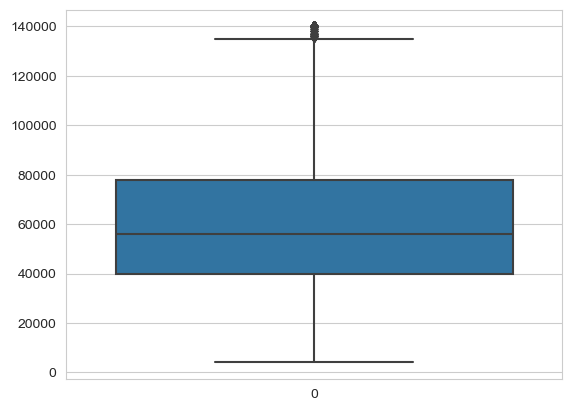

In [571]:
sns.boxplot(df2.annual_inc)

annual_inc looks cleaner and checking out similar such outliers in loan_amnt,funded_amnt_inv,dti

<Axes: >

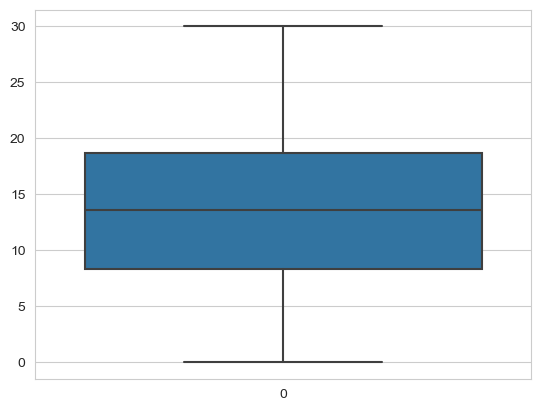

In [572]:
sns.boxplot(df2.dti)

<Axes: >

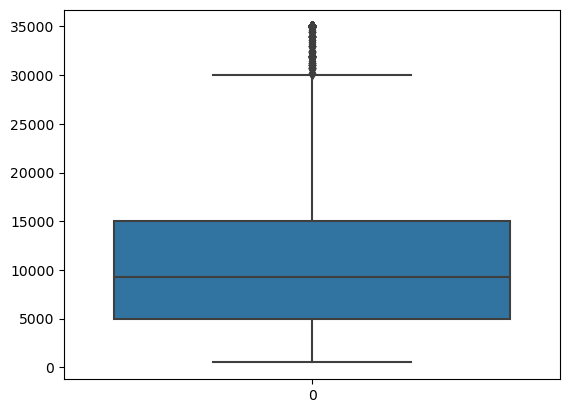

In [316]:
sns.boxplot(df2.loan_amnt)

In [573]:
df2.loan_amnt.quantile([0.75,0.90,0.95,0.975,0.98,0.99,1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

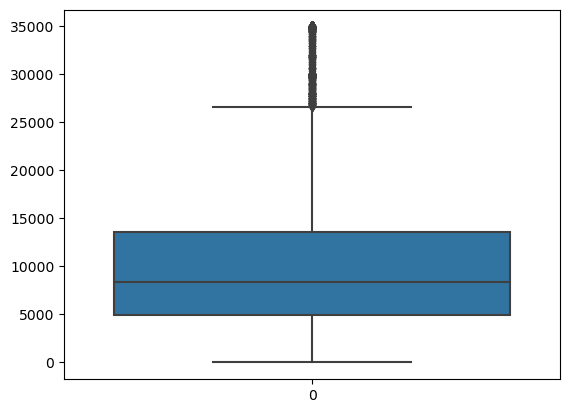

In [391]:
sns.boxplot(df2.funded_amnt_inv)

In [574]:
df2.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.975,0.98,0.985,0.99,1.0])

0.500     8400.000000
0.750    13650.000000
0.900    19750.000000
0.950    23950.000000
0.975    25395.000000
0.980    27953.915457
0.985    29925.000000
0.990    31958.552951
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

Visulaizing few categorical data columns


<Axes: xlabel='loan_status', ylabel='count'>

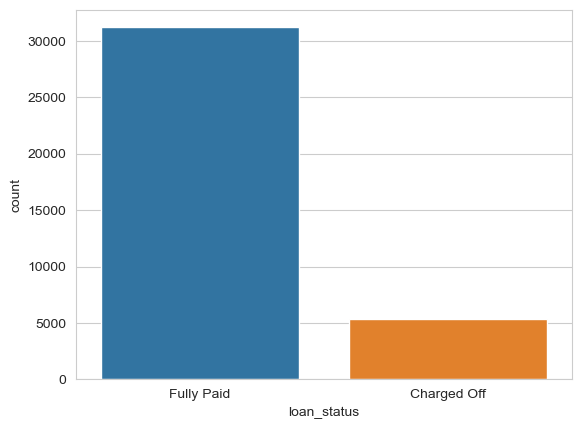

In [575]:
sns.countplot(x='loan_status',data=df2)

In [576]:
df2.sub_grade.value_counts()

sub_grade
A4    2749
B3    2652
A5    2595
B5    2490
B4    2327
C1    1959
B2    1896
C2    1835
A3    1748
B1    1716
A2    1450
C3    1410
D2    1217
C4    1150
A1    1097
C5    1088
D3    1059
D1     880
D4     866
D5     785
E1     675
E2     558
E3     466
E4     391
E5     340
F1     275
F2     215
F3     156
F4     137
F5      98
G1      85
G2      65
G4      45
G3      40
G5      22
Name: count, dtype: int64

Checking for existance of coorelation in different fields 

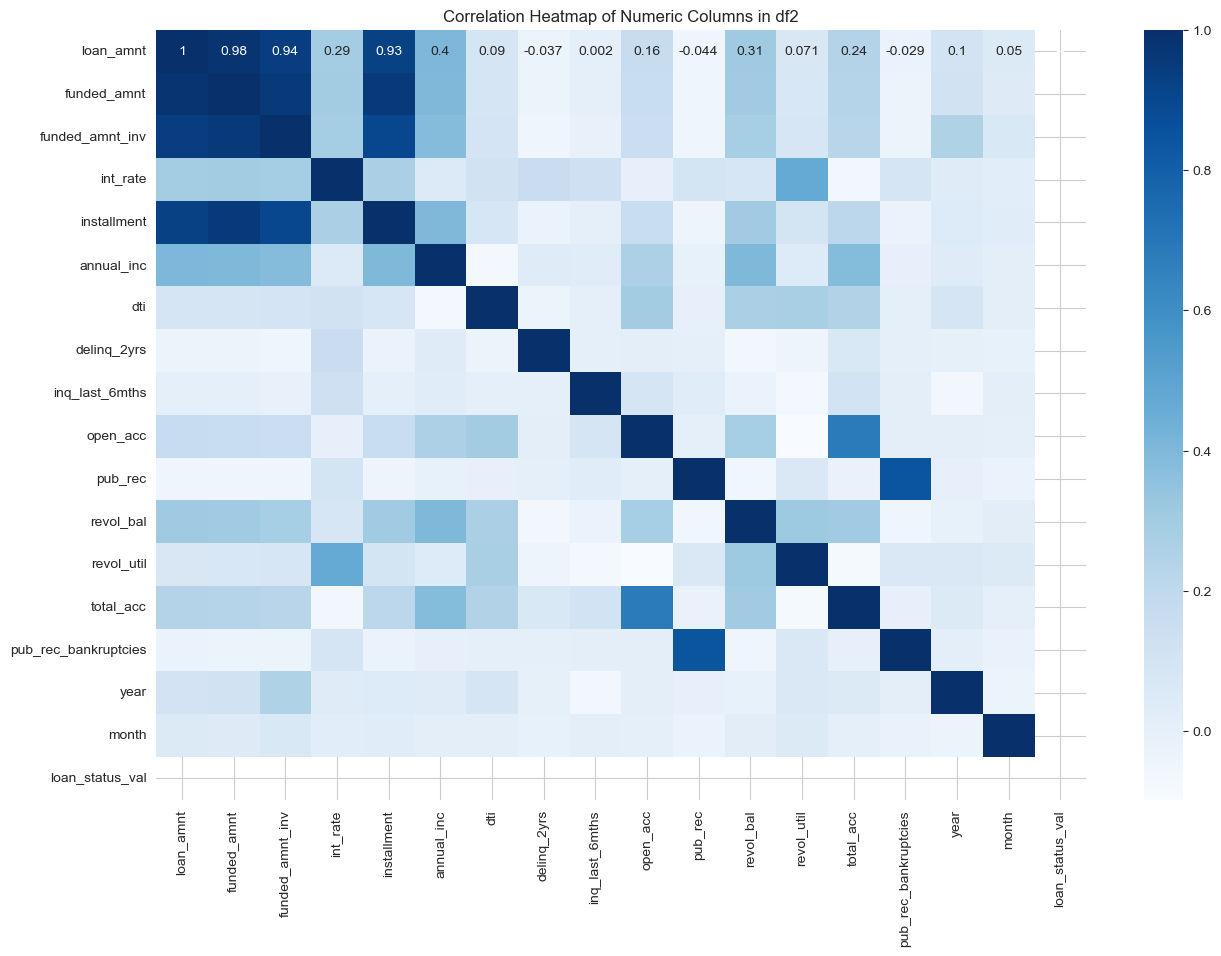

In [649]:
numeric_df = df2.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Numeric Columns in df2')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.show()

In [578]:
df2['loan_status_val'] = df2['loan_status'].apply(lambda x: 1 if x=='Charged off' else 0)
df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month,loan_status_val
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10,...,1,3,0,13648,83.7,9,0.0,2011,12,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,...,5,3,0,1687,9.4,4,0.0,2011,12,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10,...,2,2,0,2956,98.5,10,0.0,2011,12,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,1,10,0,5598,21.0,37,0.0,2011,12,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,...,3,9,0,7963,28.3,12,0.0,2011,12,0


In [579]:
print(np.isnan(coorelation_matrix).sum())
print(np.isinf(coorelation_matrix).sum())

loan_amnt                1
funded_amnt              1
funded_amnt_inv          1
int_rate                 1
installment              1
annual_inc               1
dti                      1
delinq_2yrs              1
inq_last_6mths           1
open_acc                 1
pub_rec                  1
revol_bal                1
revol_util               1
total_acc                1
pub_rec_bankruptcies     1
year                     1
month                    1
loan_status_val         18
dtype: int64
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
int_rate                0
installment             0
annual_inc              0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
year                    0
month                   0
loan_status_val         0
dtype: int64


In [580]:

coorelation_matrix = numeric_df.corr().fillna(0)

# Univariate Analysis
After all above data

Compraing the loan_status fields

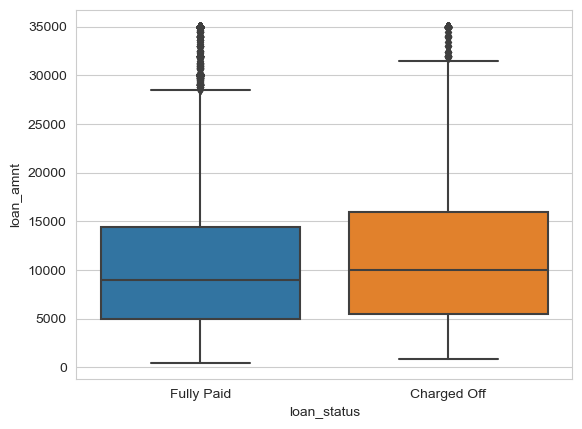

In [412]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df2)
plt.show()

In [413]:
df2.loan_amnt.describe()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Limiting the data to 75% after the huge difference seen in mean and median

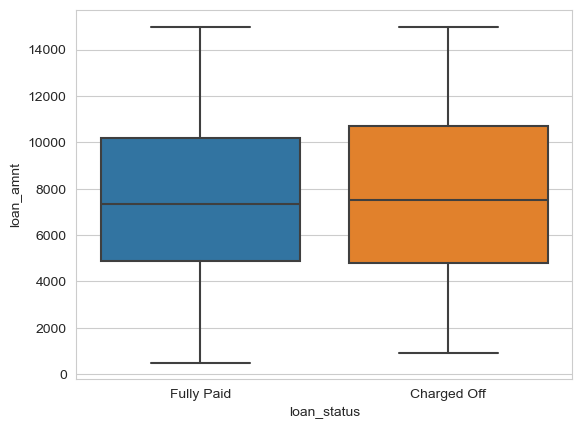

In [425]:

df2_75 = df2.loc[(df2['loan_amnt']<=15000)]
sns.boxplot(x='loan_status',y='loan_amnt',data=df2_75)
plt.show()

####Result
From the above we can conclude that higher the amount higher the chances of default

As part of further analysis let's bin the data into percentiles , analyze loan defaults and visulaize same 

In [438]:
df2['loan_amnt_p']= pd.qcut(df2['loan_amnt'],q=5,labels=False)
#Converting loan status to numerical represenation

df2['loan_status']=df2['loan_status'].replace({'Charged off':1,'Fully Paid':0})
def_rates = df2.groupby('loan_amnt_p')['loan_status'].mean()*100

Plotting the above data

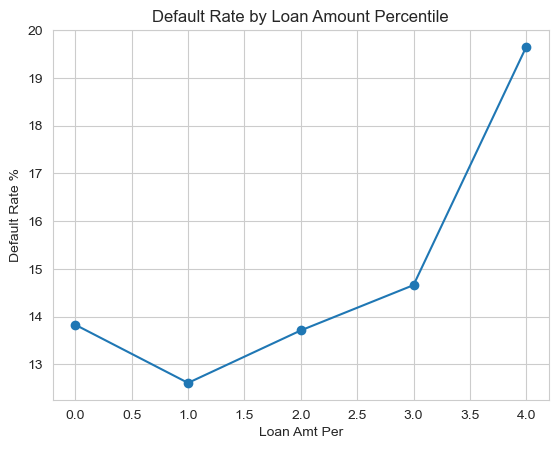

loan_amnt_p
0    13.829787
1    12.611911
2    13.711414
3    14.660206
4    19.648538
Name: loan_status, dtype: float64


In [456]:
plt.plot(def_rates.index,def_rates.values,marker='o')
plt.xlabel('Loan Amt Per')
plt.ylabel('Default Rate %')
plt.title('Default Rate by Loan Amount Percentile')
plt.show()
print(def_rates)

###Results:
Higher the loan amount higher the chance of getting default

In [462]:
##Next considering Installement field
df2.installment.describe()

count    36654.000000
mean       311.888682
std        199.230096
min         15.690000
25%        163.080000
50%        270.420000
75%        408.480000
max       1305.190000
Name: installment, dtype: float64

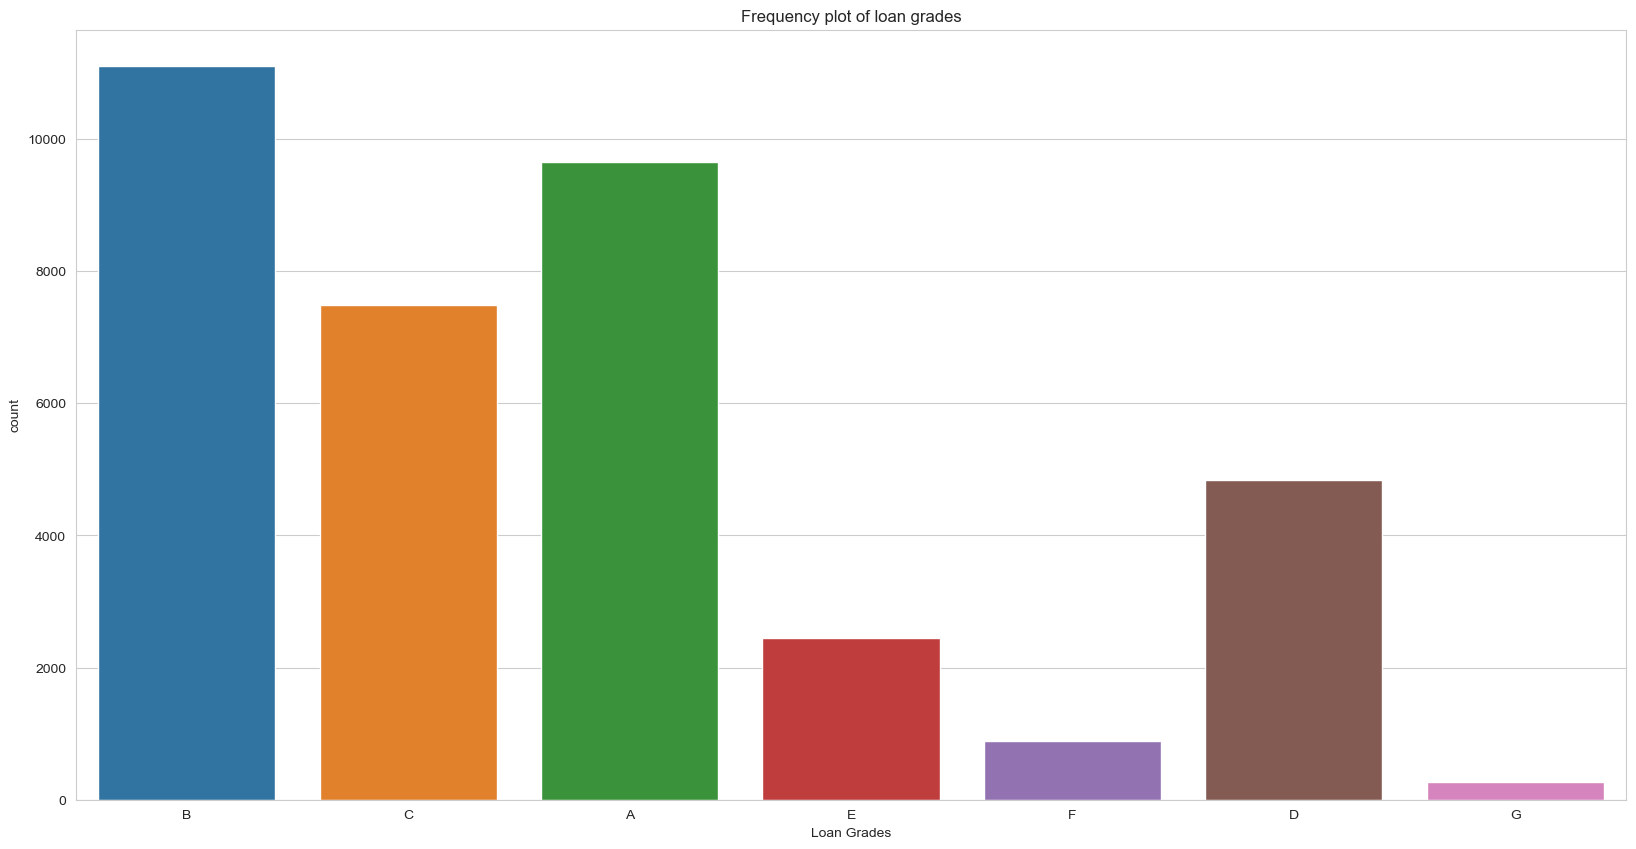

In [482]:
####Analysis on grade column

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(x='grade', data=df2)
plt.title("Frequency plot of loan grades")
plt.xlabel('Loan Grades')
plt.show()

###Results
Majority of loans were given to grade-b followed by grade a and c

In [483]:
df2.annual_inc.describe()

count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

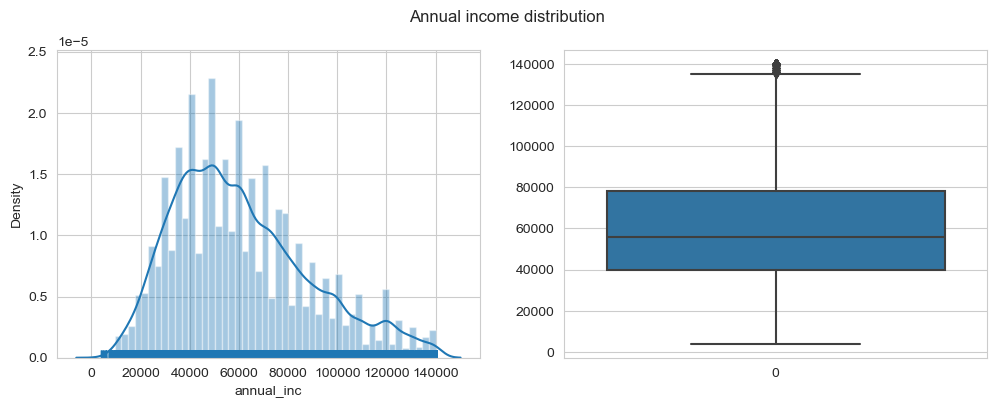

In [590]:
##On annaual income column
var1 = df2.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Annual income distribution')
plt.show()

###Results<br>
Around 361 people are having more the 235000 annual income. and 99% of people are having incomes below 235000.

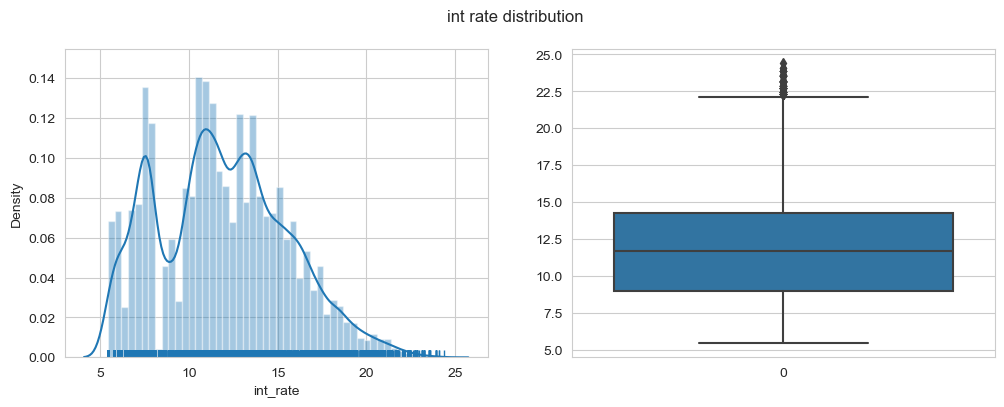

In [587]:
##Checking out int_rate trend
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=df2.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df2.int_rate)
plt.suptitle('int rate distribution')
plt.show()

###Results: <br>
Most of the interest lies in between 9-14%, couple of them did take 22% 

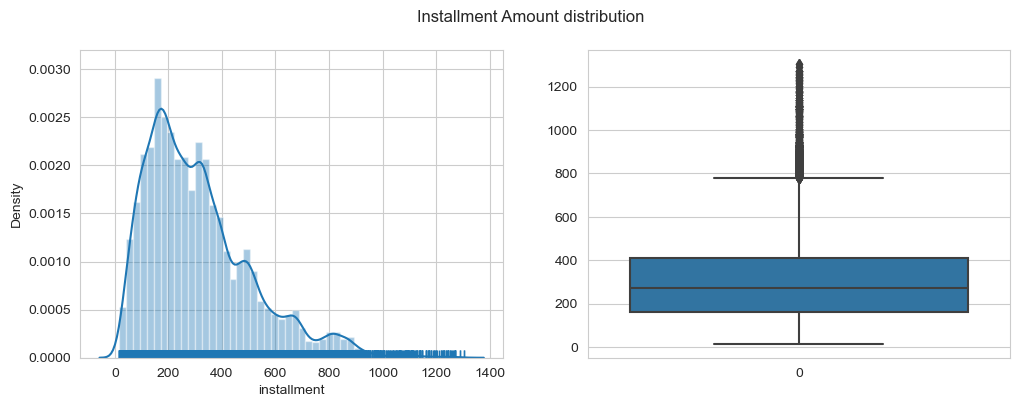

In [588]:
installment = df2.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment distribution')
plt.show()

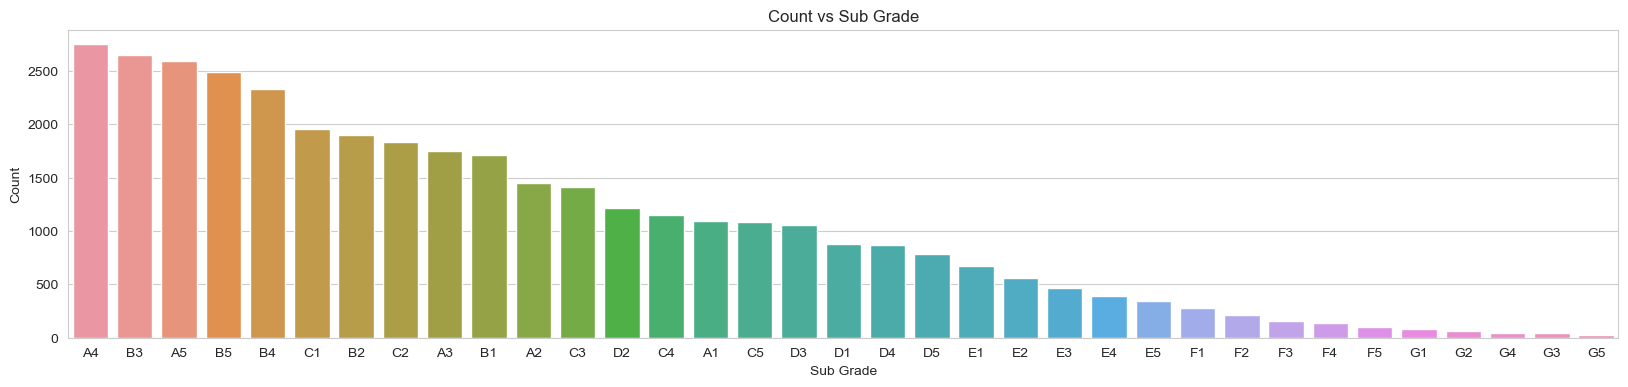

In [633]:
if isinstance(df2.sub_grade, pd.Series):
    plt.figure(figsize=(20, 4))
    ##converting to categorical if not provided 
    df2['sub_grade'] = pd.Categorical(df2['sub_grade'])
    sns.countplot(data=df2, x='sub_grade', order=df2['sub_grade'].value_counts().index)
    plt.title('Count vs Sub Grade')
    plt.xlabel('Sub Grade')
    plt.ylabel('Count')
    plt.show()
else:
    print("df2.sub_grade is not a pandas Series.")

Text(0.5, 1.0, 'loan_status vs Interest Rate')

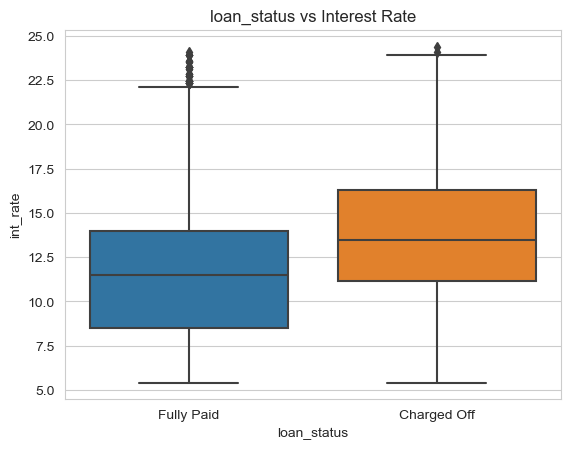

In [596]:
sns.boxplot(x='loan_status', y=df2.int_rate, data=df2)
plt.title('loan_status vs Interest Rate')

####Results
This clearly tells us the there is a great chance of defualting with higher interest rate

Text(0.5, 1.0, 'Purpose vs Int_Rate')

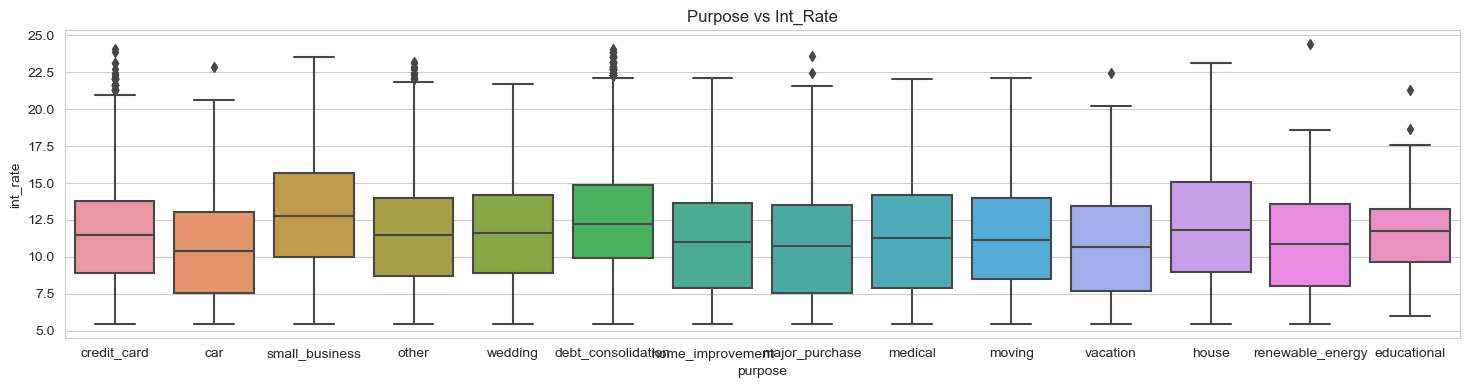

In [600]:
plt.figure(figsize=(18,4))
sns.boxplot(x='purpose', y=df2.int_rate, data=df2)
plt.title('Purpose vs Int_Rate')

small_business , debt_consolidation and house are higher higher int_rate

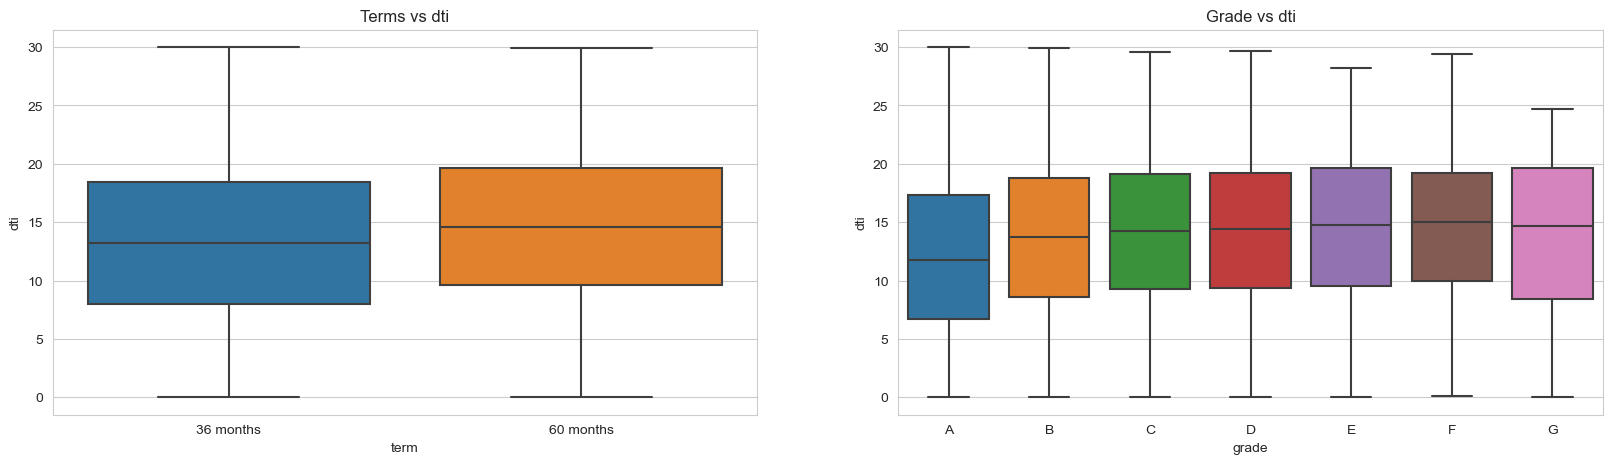

In [634]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Terms vs dti
sns.boxplot(x='term', y='dti', data=df2, ax=axs[0])
axs[0].set_title('Terms vs dti')
#  Grade vs dti
grade_ord = df2.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y='dti', order=grade_ord, data=df2, ax=axs[1])
axs[1].set_title('Grade vs dti')
plt.show()

DTI is higher for folks who get more tenure & expect for Grade A with higher DTI all other have more chances of default given DTI is high

Text(0.5, 1.0, 'loan_status vs dti')

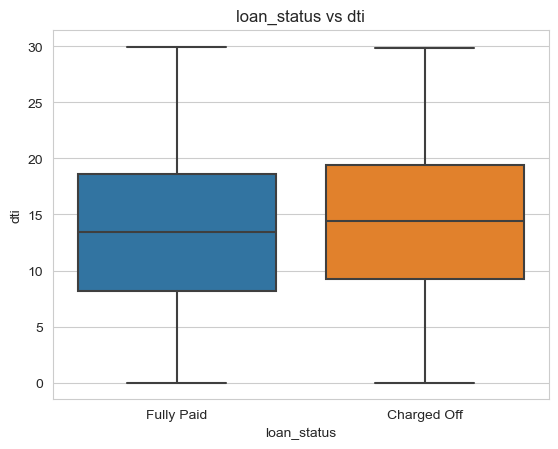

In [611]:
sns.boxplot(x='loan_status', y=df2.dti, data=df2)
plt.title('loan_status vs dti')

Higher the DTI higher the chance of defaulting

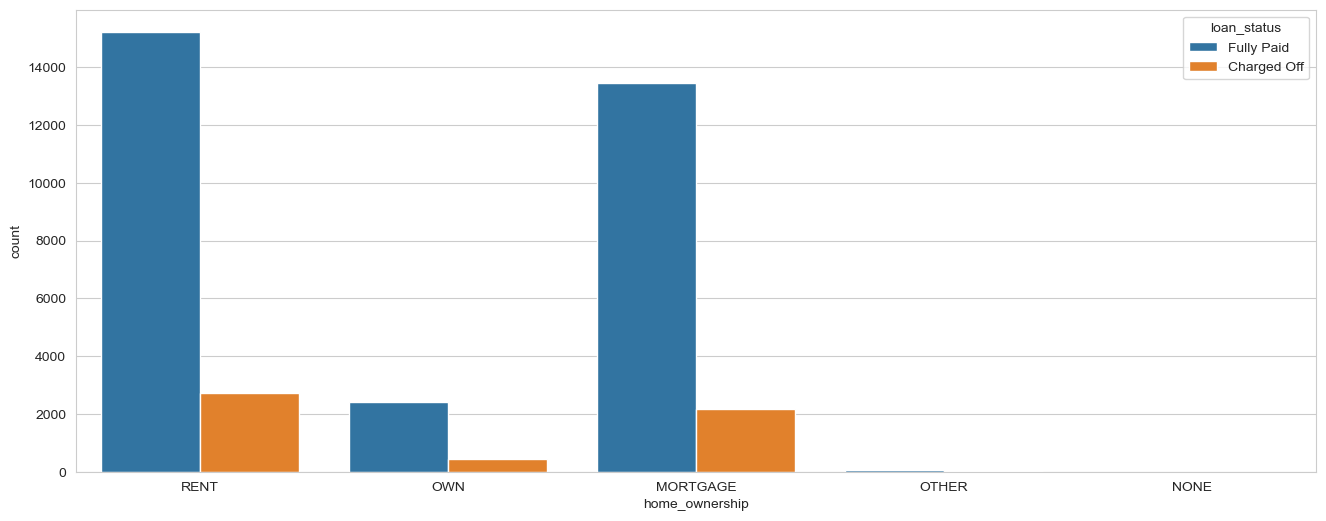

In [666]:
#home_ownership
plt.figure(figsize=(16,6))
sns.countplot(x ='home_ownership', data = df2, hue='loan_status')
plt.show()

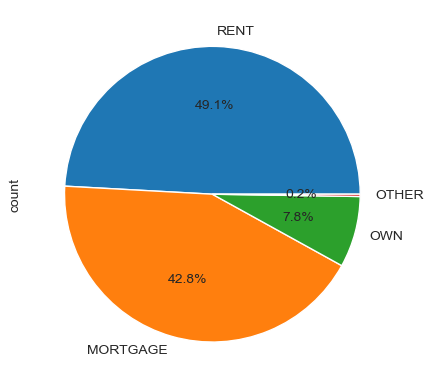

In [668]:
df3= df2[df2['home_ownership']!='NONE']
df3['home_ownership'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

The feature Home Ownership reflect an interesting insights, that most of the borrower who stays in Rent or Mortgage are the loan applicants and out of these two who stays in Rent is having higher percentage of Fully Paid.

# Bivariant

Majority of loan applicants income is above 10Lakhs

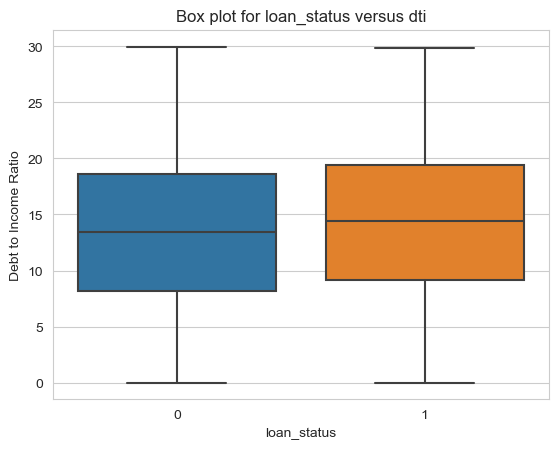

In [508]:
################# Bivariate analysis two categorical variables loan status and dti

fig, ax = plt.subplots()
sns.boxplot(y='dti', x='loan_status', data=df2)
plt.title('Box plot for loan_status versus dti')
plt.ylabel('Debt to Income Ratio')
plt.show()

As we there no such siginificant corelation

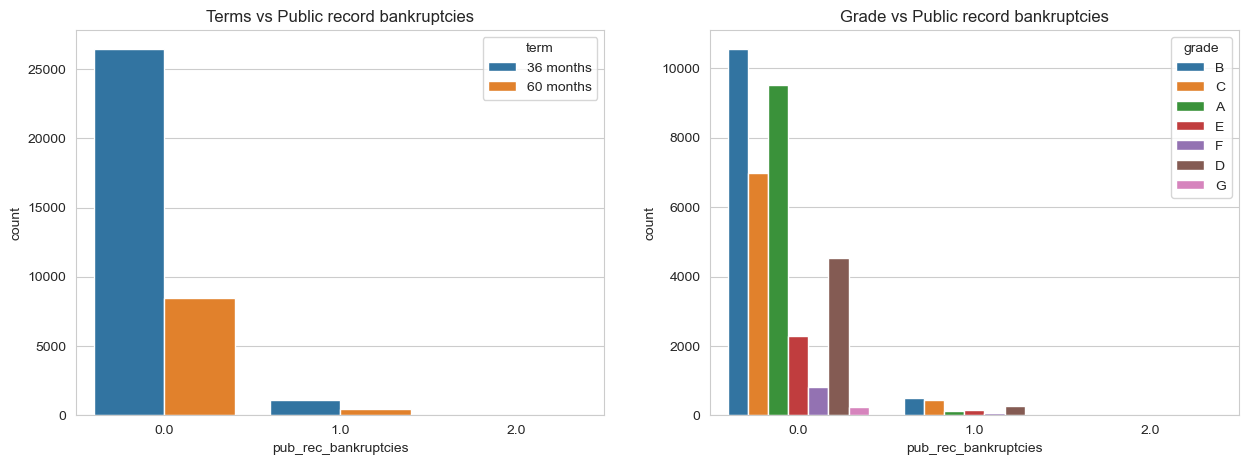

In [621]:
plt.figure(figsize=(15, 5))

#Terms vs Public record bankruptcies
plt.subplot(121)
sns.countplot(x='pub_rec_bankruptcies', hue='term', data=df2)
plt.title('Terms vs Public record bankruptcies')
# Grade vs Public record bankruptcies
plt.subplot(122)
sns.countplot(x='pub_rec_bankruptcies', hue='grade', data=df2)
plt.title('Grade vs Public record bankruptcies')
plt.show()

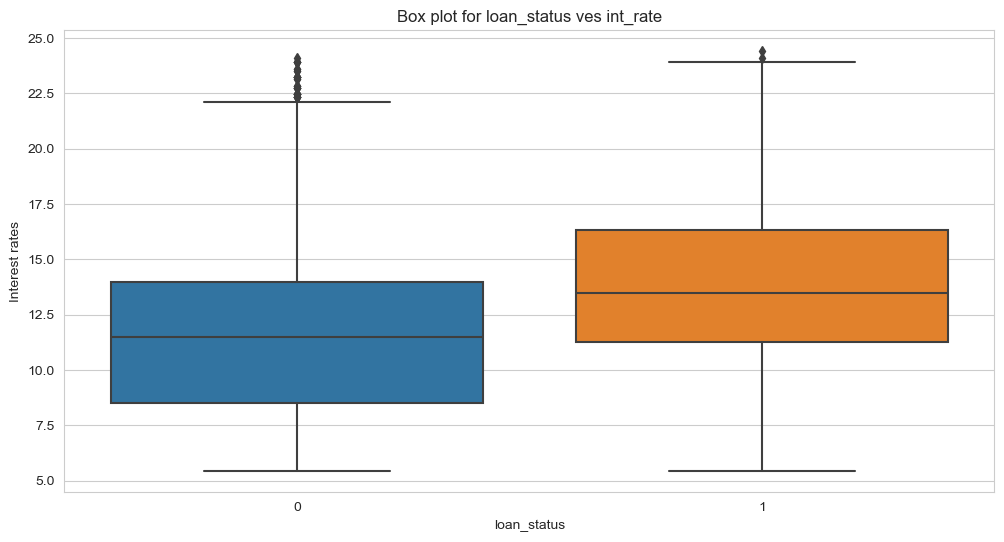

In [498]:
#### Bivariate analysis on loan status and interest rate

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.boxplot(y='int_rate', x='loan_status', data=df2)
plt.title('Box plot for loan_status ves int_rate')
plt.ylabel('Interest rates')
plt.show()

####Results
We can see that higher the interest rate more the chances of loan getting charged_off

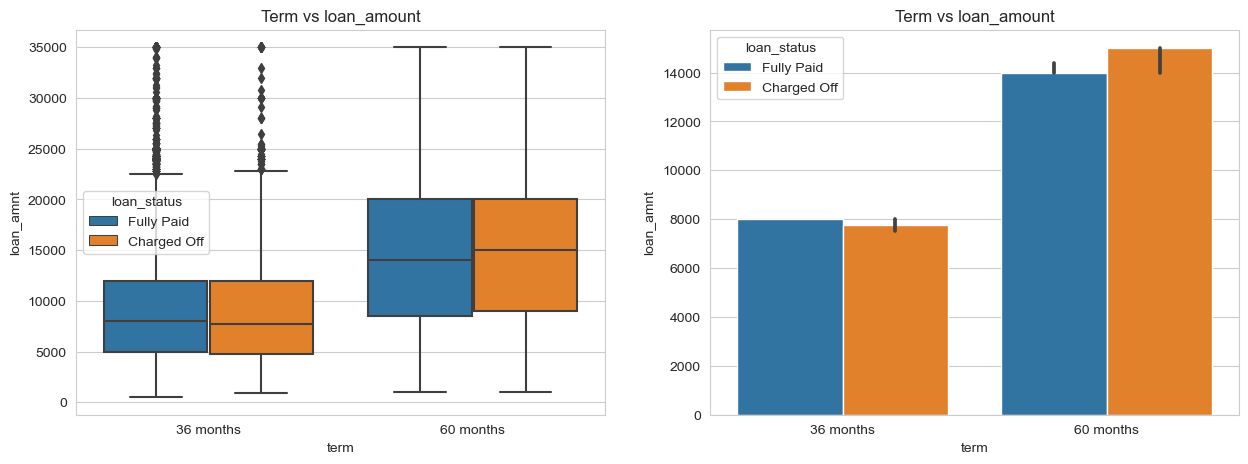

In [624]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=df2)
plt.title('Term vs loan_amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=df2, estimator=np.median)
plt.title('Term vs loan_amount')
plt.show()

Loan amount be in 36 or 60 months is not a decider for defaults.
Borrowers have equal distribution in both

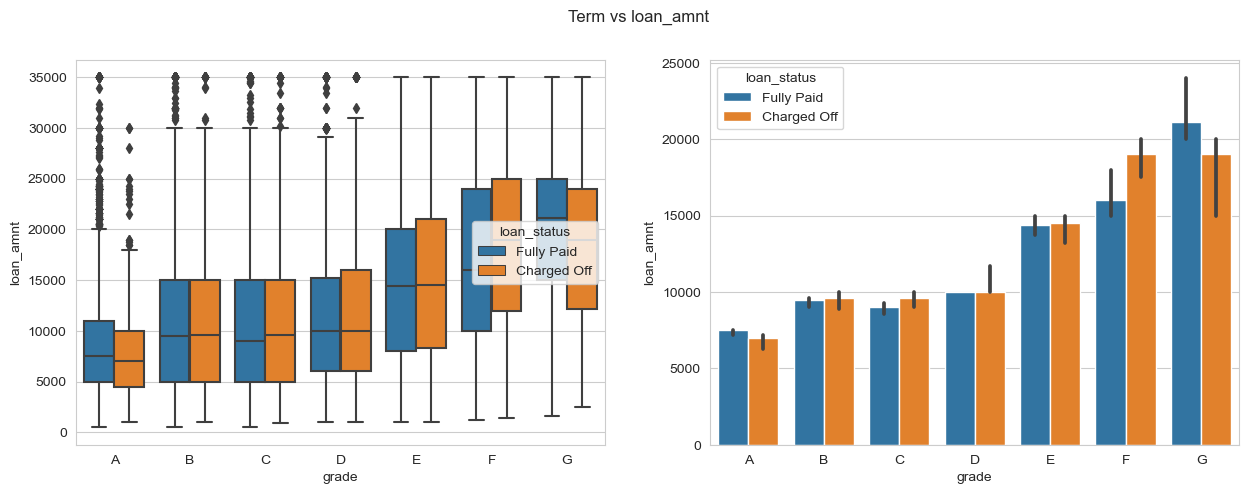

In [626]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=df2, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=df2, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan_amnt')
plt.show()

As of above lower grade people have higher loan and are prone to more chances of defaulting

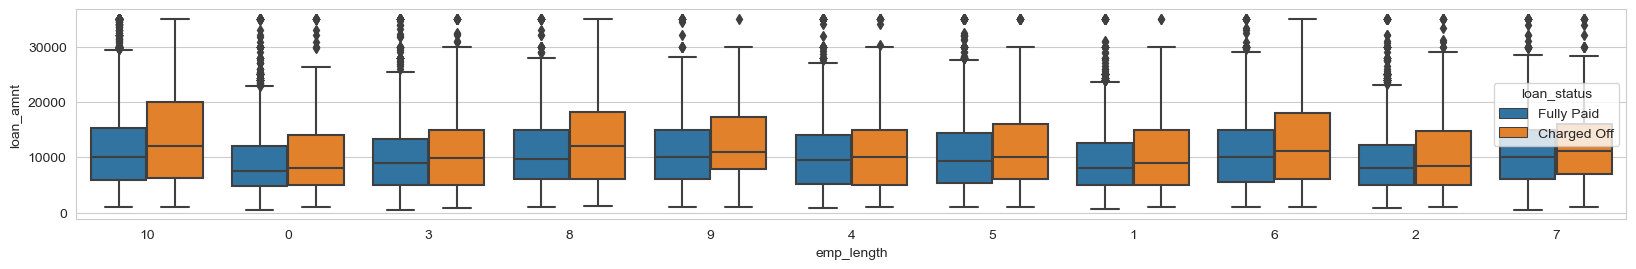

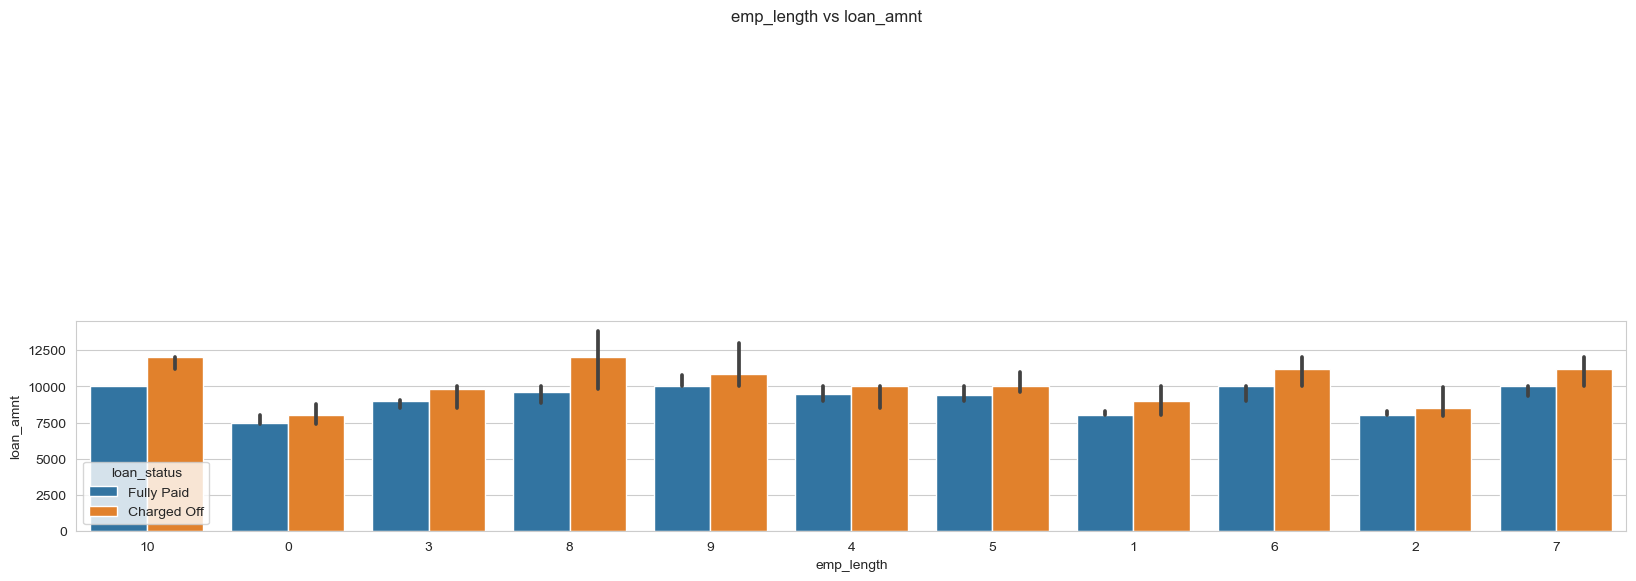

In [628]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=df2)
plt.figure(figsize=(20,6))
plt.subplot(212)
plt.suptitle('emp_length vs loan_amnt')
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=df2, estimator=np.median)
plt.show()

Borrowers having higher months of employememt followed taking higher loans are likely to default

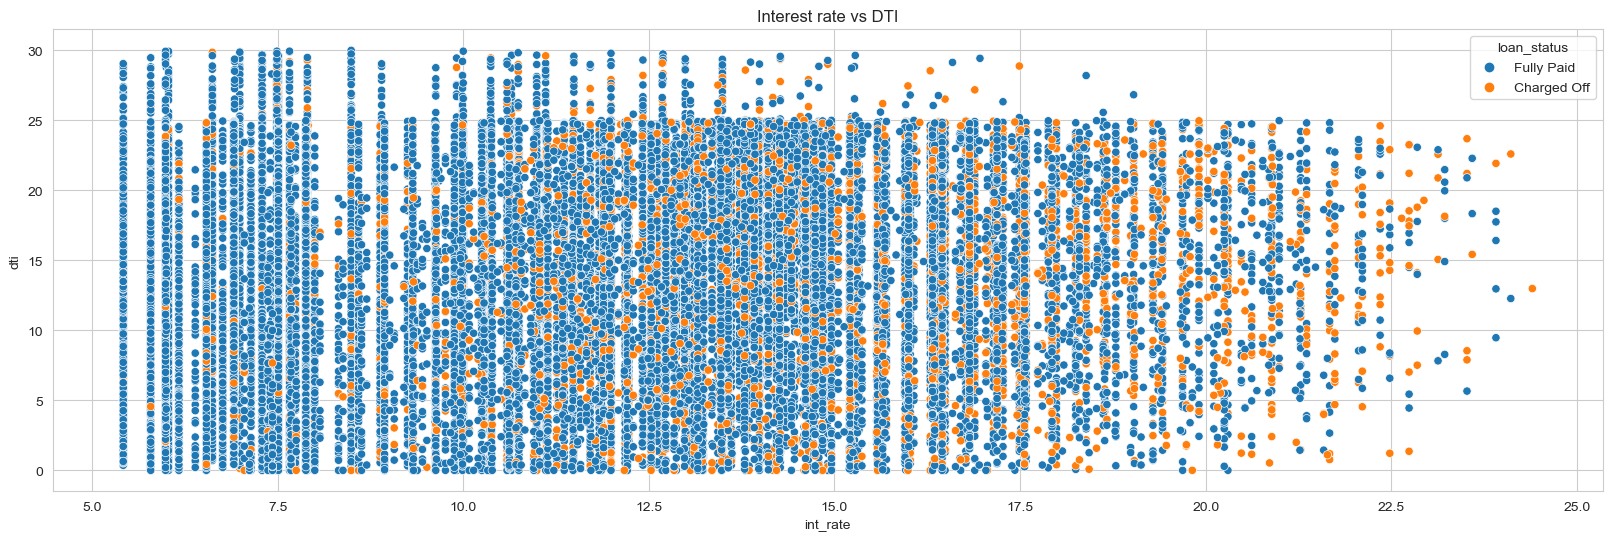

In [645]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=df2, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

##Results: <br>
Values are spread all accross, but we can see one thing here irrespective of DTI when interest rates are high charged off loans are high.
